In [56]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [59]:
base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
# base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

load_folder = base_location / Path(r'tmp')
h5_recons_locations = str((load_folder / Path(r'all/f1*-ft/reconstructs/best_resids_*.h5')).resolve())
# load_folder = base_location / Path(r'Figure_3')
# h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\reconstructs\best_resids_*.h5')).resolve())
# load_folder = base_location / Path(r'Figure_4_g1')
# h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\reconstructs\best_resids_*.h5')).resolve())
# load_folder = base_location / Path(r'Figure_4_g2')
# h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\reconstructs\best_resids_*.h5')).resolve())
# load_folder = base_location / Path(r'Figure_5_g1')
# h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\reconstructs\best_resids_*.h5')).resolve())
# load_folder = base_location / Path(r'Figure_5_g2')
# h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

out_folder = base_location / Path(r'final_outputs')

out_loc = str((out_folder).resolve())
h5_recons_locations = glob.glob(h5_recons_locations)

In [60]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
#                 'photometryCenterInIndex':(0,0),
#                 'photometryCenterOutIndex':(0,0),
# #                 'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideInIndexnr':(0,0),
#                 'photometrySideOutIndex':(0,0),
#                 'sl': (0,0),
#                 'spnnrOff': (0,0),
#                 'photometryCenterInIndex':(0,0),
#                 'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
#                 'photometrySideOutIndex':(0,0),
#                 'sl': (0,0),
#                 'spnnrOff': (0,0),
                }.keys())
shortened_keys = [dfh.shorten_col_name(_) for _ in base_keys]
# base_keys

In [61]:
def get_delta_list(event_srs, event_col, keep_srs,
                                                           preserve_cols=['nTrial',
                                                                            'file_num',
                                                                            # 'nTrial_filenum',
                                                                            'dupe',
                                                                            'nTrial',
                                                                            'nEndTrial',
                                                                            'wi_trial_keep']):
    
    keep_eg_lst = []
    delta_keep_eg_lst = []

    rdc = []
    entry_num = np.arange(len(event_srs))
    event = np.where(event_srs.values == 1)
    assert len(event) == 1
    event = event[0]
    
    for iev, ev in enumerate(event):
        delta = entry_num - ev
        keep_eg = (delta >= -40)&(delta <= 100)&keep_srs
        delta_keep_eg = delta[keep_eg]
        keep_eg_lst.append(keep_eg)
        delta_keep_eg_lst.append(delta_keep_eg)

    return keep_eg_lst, delta_keep_eg_lst

# full_df = h5_lst[0]


In [62]:


# resid_df = resid_df[~resid_df['dupe']]

# # display(resid_df)
# # break

# b0 = np.arange(len(resid_df))
# # display(b0)

# rdc = []

# lb = -40
# ub = 100

# pred_params_cols = [_ for _ in resid_df.columns if 'pred_paramsNum=' in _]


# true_col = pred_params_cols[0].replace('pred_paramsNum=0_', '').split('_')[0]
# print('true_col', true_col)

# for event_col in ['photometrySideInIndexr']:
#     resid_df_cutdown = resid_df[['Unnamed: 0', 'file_num', 'dupe', 'nTrial', 'nEndTrial', 'wi_trial_keep',
#                                 'gDA', 'gACH', 'rDA', event_col] + pred_params_cols].copy()

#     event = np.where(resid_df_cutdown[event_col].values == 1)[0]
#     print(b0.shape, event.shape)
#     for iev, ev in enumerate(event):
#         delta = b0 - ev
#         # print(delta)
#         keep_eg = (delta >= -40)&(delta <= 100)&(resid_df['is_holdout'])
#         delta_keep_eg = delta[keep_eg]
#         rdf_tmp = resid_df_cutdown.loc[keep_eg].copy()
#         rdf_tmp['delta'] = delta_keep_eg
#         # rdf_tmp = rdf_tmp[~rdf_tmp['dupe']]
#         # display(rdf_tmp)
#         # display(list(rdf_tmp.columns))
#         rdc.append(rdf_tmp.set_index('delta'))

#     # rdc_df = pd.concat(rdc, axis=0)
#     # display(rdc_df)
#     # rdc_df = rdc_df[[true_col]]
#     # delta_index.append(delta)
#     # delta_val.append((bs.confidence_interval.low, mn_val, bs.confidence_interval.high))

#     reconstruction_data_list = []

#     seed = np.random.randint(1000000000)
#     for bootstrap_col in [true_col] + pred_params_cols:
#         rdc_lst = []
#         for rdc_df in rdc:
#             rdc_lst.append(rdc_df[[bootstrap_col]])
#         rdc_df = pd.concat(rdc_lst, axis=1)

#         for delta in rdc_df.index:
#             row = rdc_df.loc[delta].dropna().values
#             mn_val = row.mean()
#             bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999,
#                                        batch=None, vectorized=True, paired=False,
#                                        axis=0, confidence_level=0.95, method='BCa',
#                                        random_state=seed)

#             rtup = (bootstrap_col, delta, bs.confidence_interval.low, mn_val, bs.confidence_interval.high)
#             reconstruction_data_list.append(rtup)
#             print(reconstruction_data_list[-1])

In [69]:
h5_lst = []
for h5_coef_fn in h5_recons_locations:
    h5f = pd.HDFStore(h5_coef_fn)
    h5fk = h5f.keys()
    for key in h5fk:
        # if 'run_num' in key and 'run_num__0' not in key:
        #     continue
        print(key)
        
        y_col = key.split('_')[0].replace('/', '')
        h5_df = pd.read_hdf(h5f, key)
        
        h5_df.columns = [dfh.shorten_col_name(_) for _ in h5_df.columns]
        
        if 'dfrel_basis' != key.replace('/', ''):
            h5_df.columns = [_.split('_')[0] for _ in h5_df.columns]
            h5_df['true'] = h5_lst[0][y_col]
            h5_df['resid2'] = (h5_df['true'] - h5_df['pred'])**2
            
            h5_df.columns = [_.split('_')[0] for _ in h5_df.columns]
            h5_lst.append(h5_df)
        else:
            h5_lst.append(h5_df)
        
# concat = pd.concat(h5_lst, axis=0)

/dfrel_basis
/gACH_0_0_base_simple_run_num__0
/gACH_0_0_base_simple_run_num__1
/gACH_0_0_base_simple_run_num__10
/gACH_0_0_base_simple_run_num__2
/gACH_0_0_base_simple_run_num__3
/gACH_0_0_base_simple_run_num__4
/gACH_0_0_base_simple_run_num__5
/gACH_0_0_base_simple_run_num__6
/gACH_0_0_base_simple_run_num__7
/gACH_0_0_base_simple_run_num__8
/gACH_0_0_base_simple_run_num__9


keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])


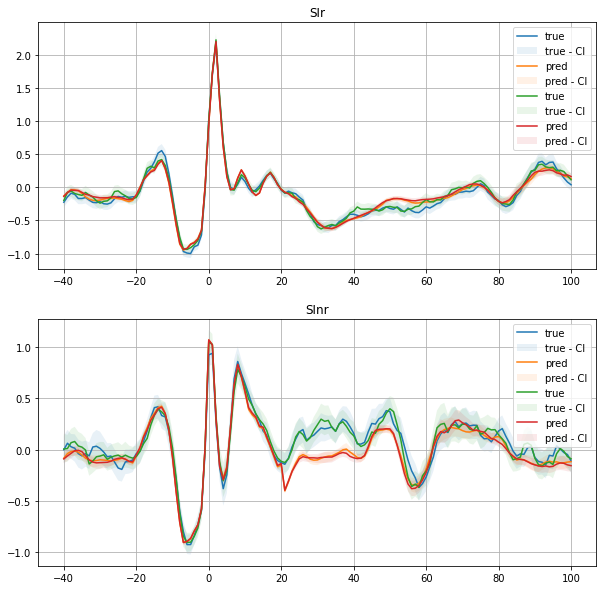

In [79]:
from collections import defaultdict
from tqdm.notebook import tqdm, trange
import scipy.stats
import matplotlib.pyplot as plt

i = 2

fig,axes = plt.subplots(2,1,figsize=(10,10))
for i in range(1,3):
   for iac, alignment_col in enumerate(['SIr', 'SInr',
                        #  'SIAA', 'SIAa', 'SIaA', 'SIaa',
                        #  'SIAB', 'SIAb', 'SIaB', 'SIab',
                        ]):
      ax = axes[iac]
      # keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, ((h5_lst[i]['holdout']==0)*0+1).astype(bool))
      keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, (h5_lst[i]['holdout']==1).astype(bool))
      rdc_lst = defaultdict(list)
      for entry_num in range(len(keep_rows)):
         keep_row_single = keep_rows[entry_num]
         deltas = assoc_deltas[entry_num]
         rdc_df = h5_lst[1].loc[keep_row_single].set_index(deltas)
         reconstruction_data_list = []

         for bootstrap_col in ['true', 'pred']:
            rdc_lst[bootstrap_col].append(rdc_df[[bootstrap_col]])

      print('keys', rdc_lst.keys())

      combo_rdc = {}
      seed = np.random.randint(1000000000)
      for bootstrap_col in (rdc_lst):
         tmp_rdc = pd.concat(rdc_lst[bootstrap_col], axis=1)

         reconstruction_data_list = []
         for delta in (tmp_rdc.index):
            row = tmp_rdc.loc[delta].dropna().values
            bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999,
                                       batch=None, vectorized=True, paired=False,
                                       axis=0, confidence_level=0.95, method='BCa',
                                       random_state=seed)

            mn_val = row.mean()
            rtup = (bootstrap_col, delta, bs.confidence_interval.low, mn_val, bs.confidence_interval.high)

            reconstruction_data_list.append(rtup)
         
         tmp_combo_rdc = pd.DataFrame(reconstruction_data_list, columns=['basis_column', 'delta', 'boot_lower_bound', 'mean', 'boot_upper_bound']).set_index('delta')
         combo_rdc[bootstrap_col] = tmp_combo_rdc
         
         # if bootstrap_col == 'true':
         ax.plot(tmp_combo_rdc.index, tmp_combo_rdc['mean'], label=f'{bootstrap_col}')#, color='b')
         ax.fill_between(tmp_combo_rdc.index, tmp_combo_rdc['boot_lower_bound'], tmp_combo_rdc['boot_upper_bound'], alpha=0.1, label=f'{bootstrap_col} - CI')#, color='b')
         ax.grid(True)
         ax.legend()
      # plt.suptitle(alignment_col)
      ax.set_title(alignment_col)
plt.show()


keys dict_keys(['true', 'pred'])



keys dict_keys(['true', 'pred'])



keys dict_keys(['true', 'pred'])



keys dict_keys(['true', 'pred'])


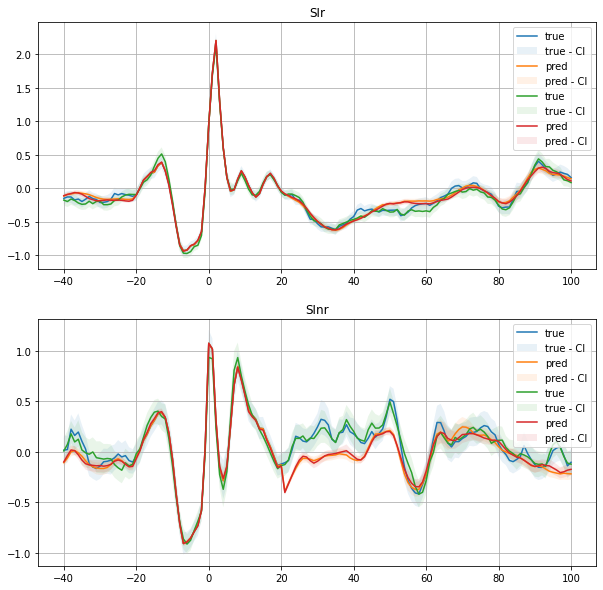

In [78]:
from collections import defaultdict
from tqdm.notebook import tqdm, trange
import scipy.stats
import matplotlib.pyplot as plt

i = 2

fig,axes = plt.subplots(2,1,figsize=(10,10))
for i in range(1,3):
   for iac, alignment_col in enumerate(['SIr', 'SInr',
                        #  'SIAA', 'SIAa', 'SIaA', 'SIaa',
                        #  'SIAB', 'SIAb', 'SIaB', 'SIab',
                        ]):
      ax = axes[iac]
      # keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, ((h5_lst[i]['holdout']==0)*0+1).astype(bool))
      keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, (h5_lst[i]['holdout']==0).astype(bool))
      rdc_lst = defaultdict(list)
      for entry_num in range(len(keep_rows)):
         keep_row_single = keep_rows[entry_num]
         deltas = assoc_deltas[entry_num]
         rdc_df = h5_lst[1].loc[keep_row_single].set_index(deltas)
         reconstruction_data_list = []

         for bootstrap_col in ['true', 'pred']:
            rdc_lst[bootstrap_col].append(rdc_df[[bootstrap_col]])

      print('keys', rdc_lst.keys())

      combo_rdc = {}
      seed = np.random.randint(1000000000)
      for bootstrap_col in (rdc_lst):
         tmp_rdc = pd.concat(rdc_lst[bootstrap_col], axis=1)

         reconstruction_data_list = []
         for delta in (tmp_rdc.index):
            row = tmp_rdc.loc[delta].dropna().values
            bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999,
                                       batch=None, vectorized=True, paired=False,
                                       axis=0, confidence_level=0.95, method='BCa',
                                       random_state=seed)

            mn_val = row.mean()
            rtup = (bootstrap_col, delta, bs.confidence_interval.low, mn_val, bs.confidence_interval.high)

            reconstruction_data_list.append(rtup)
         
         tmp_combo_rdc = pd.DataFrame(reconstruction_data_list, columns=['basis_column', 'delta', 'boot_lower_bound', 'mean', 'boot_upper_bound']).set_index('delta')
         combo_rdc[bootstrap_col] = tmp_combo_rdc
         
         # if bootstrap_col == 'true':
         ax.plot(tmp_combo_rdc.index, tmp_combo_rdc['mean'], label=f'{bootstrap_col}')#, color='b')
         ax.fill_between(tmp_combo_rdc.index, tmp_combo_rdc['boot_lower_bound'], tmp_combo_rdc['boot_upper_bound'], alpha=0.1, label=f'{bootstrap_col} - CI')#, color='b')
         ax.grid(True)
         ax.legend()
      ax.set_title(alignment_col)
      # plt.suptitle(alignment_col)
plt.show()

keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])
keys dict_keys(['true', 'pred'])


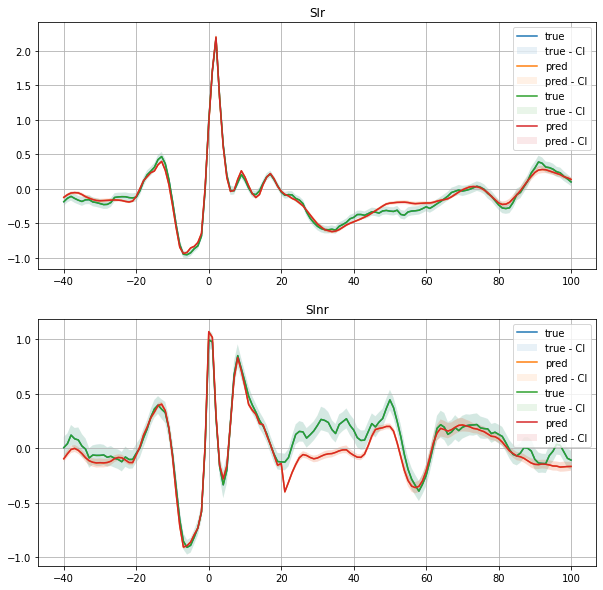

In [80]:
from collections import defaultdict
from tqdm.notebook import tqdm, trange
import scipy.stats
import matplotlib.pyplot as plt

i = 2

fig,axes = plt.subplots(2,1,figsize=(10,10))
for i in range(1,3):
   for iac, alignment_col in enumerate(['SIr', 'SInr',
                        #  'SIAA', 'SIAa', 'SIaA', 'SIaa',
                        #  'SIAB', 'SIAb', 'SIaB', 'SIab',
                        ]):
      ax = axes[iac]
      # keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, ((h5_lst[i]['holdout']==0)*0+1).astype(bool))
      keep_rows, assoc_deltas = get_delta_list(h5_lst[0][alignment_col], alignment_col, ((h5_lst[i]['holdout']==0)*0 + 1).astype(bool))
      rdc_lst = defaultdict(list)
      for entry_num in range(len(keep_rows)):
         keep_row_single = keep_rows[entry_num]
         deltas = assoc_deltas[entry_num]
         rdc_df = h5_lst[1].loc[keep_row_single].set_index(deltas)
         reconstruction_data_list = []

         for bootstrap_col in ['true', 'pred']:
            rdc_lst[bootstrap_col].append(rdc_df[[bootstrap_col]])

      print('keys', rdc_lst.keys())

      combo_rdc = {}
      seed = np.random.randint(1000000000)
      for bootstrap_col in (rdc_lst):
         tmp_rdc = pd.concat(rdc_lst[bootstrap_col], axis=1)

         reconstruction_data_list = []
         for delta in (tmp_rdc.index):
            row = tmp_rdc.loc[delta].dropna().values
            bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999,
                                       batch=None, vectorized=True, paired=False,
                                       axis=0, confidence_level=0.95, method='BCa',
                                       random_state=seed)

            mn_val = row.mean()
            rtup = (bootstrap_col, delta, bs.confidence_interval.low, mn_val, bs.confidence_interval.high)

            reconstruction_data_list.append(rtup)
         
         tmp_combo_rdc = pd.DataFrame(reconstruction_data_list, columns=['basis_column', 'delta', 'boot_lower_bound', 'mean', 'boot_upper_bound']).set_index('delta')
         combo_rdc[bootstrap_col] = tmp_combo_rdc
         
         # if bootstrap_col == 'true':
         ax.plot(tmp_combo_rdc.index, tmp_combo_rdc['mean'], label=f'{bootstrap_col}')#, color='b')
         ax.fill_between(tmp_combo_rdc.index, tmp_combo_rdc['boot_lower_bound'], tmp_combo_rdc['boot_upper_bound'], alpha=0.1, label=f'{bootstrap_col} - CI')#, color='b')
         ax.grid(True)
         ax.legend()
      ax.set_title(alignment_col)
      # plt.suptitle(alignment_col)
plt.show()

In [41]:
# combo_rdc['pred']

In [42]:

# reconstruction_data_list = []

# seed = np.random.randint(1000000000)
# for bootstrap_col in [true_col] + pred_params_cols:
#     rdc_lst = []
#     for rdc_df in rdc:
#         rdc_lst.append(rdc_df[[bootstrap_col]])
#     rdc_df = pd.concat(rdc_lst, axis=1)

#     for delta in rdc_df.index:
#         row = rdc_df.loc[delta].dropna().values
#         mn_val = row.mean()
#         bs = scipy.stats.bootstrap((row,), np.mean, n_resamples=9999,
#                                     batch=None, vectorized=True, paired=False,
#                                     axis=0, confidence_level=0.95, method='BCa',
#                                     random_state=seed)

#         rtup = (bootstrap_col, delta, bs.confidence_interval.low, mn_val, bs.confidence_interval.high)
#         reconstruction_data_list.append(rtup)
#         print(reconstruction_data_list[-1])